In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Copy of fp-historical-wildfire-data-2006-2021.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaT,2021-06-28 22:26:00,0.01,2021-07-01 13:26:00,10.00,NaT,NaN,2021-07-01 13:44:00,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaT,2021-03-30 14:30:00,0.01,2021-03-30 14:30:00,0.01,2021-03-30 14:35:00,0.01,2021-04-09 08:30:00,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaT,2021-04-16 16:57:00,0.10,2021-04-16 16:57:00,0.10,NaT,NaN,2021-04-17 14:15:00,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaT,2021-04-17 15:20:00,0.01,2021-04-17 15:20:00,0.01,NaT,NaN,2021-04-17 15:24:00,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaT,2021-04-01 19:10:00,7.13,2021-04-02 11:00:00,7.13,2021-04-02 15:52:00,7.13,2021-04-12 14:30:00,7.13


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22914 non-null  int64         
 1   fire_number                   22914 non-null  object        
 2   fire_name                     604 non-null    object        
 3   current_size                  22914 non-null  float64       
 4   size_class                    22914 non-null  object        
 5   fire_location_latitude        22914 non-null  float64       
 6   fire_location_longitude       22914 non-null  float64       
 7   fire_origin                   22905 non-null  object        
 8   general_cause_desc            22914 non-null  object        
 9   industry_identifier_desc      408 non-null    object        
 10  responsible_group_desc        9031 non-null   object        
 11  activity_class              

In [ ]:
date_columns = ['first_bucket_drop_date', 'bh_fs_date', 'uc_fs_date', 'to_fs_date', 'ex_fs_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

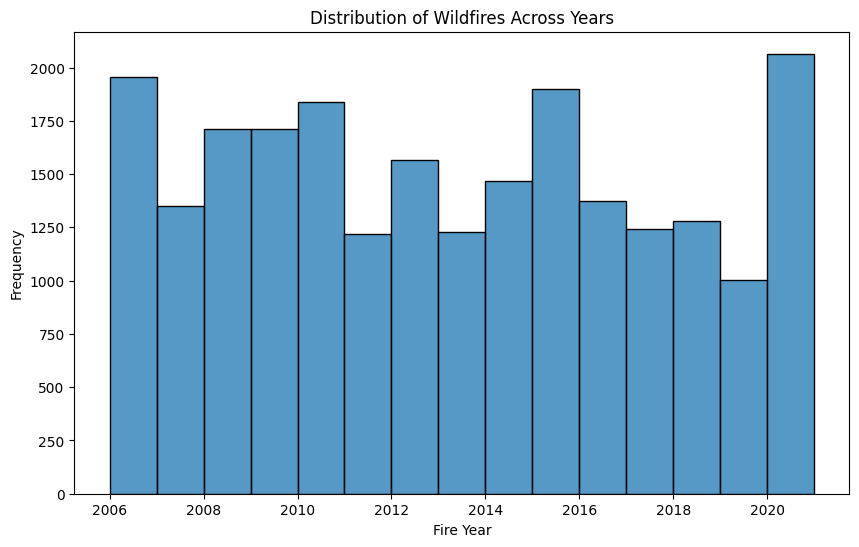

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fire_year', bins=15, kde=False)
plt.title('Distribution of Wildfires Across Years')
plt.xlabel('Fire Year')
plt.ylabel('Frequency')
plt.show()


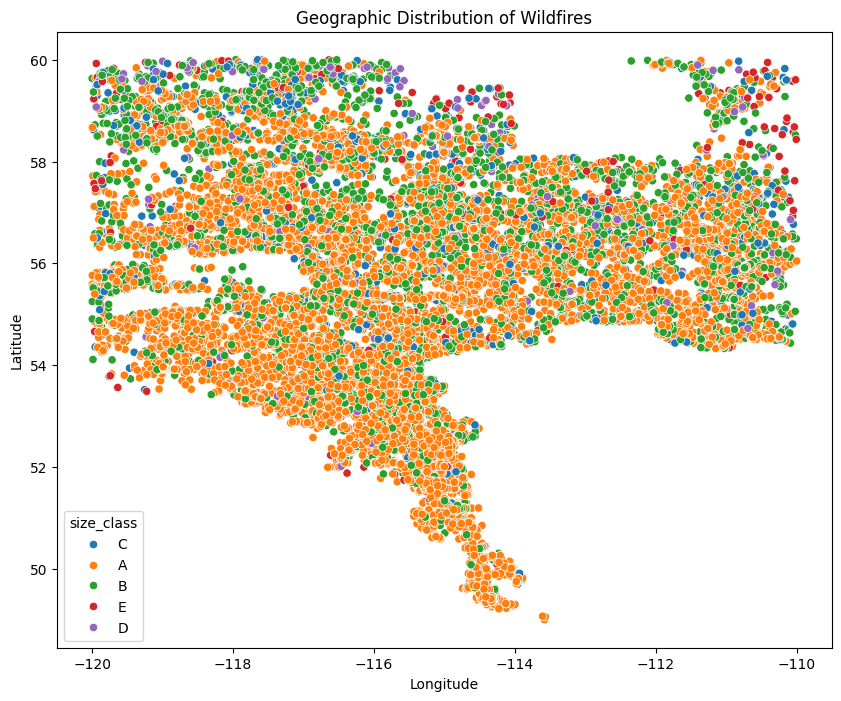

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='fire_location_longitude', y='fire_location_latitude', hue='size_class')
plt.title('Geographic Distribution of Wildfires')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


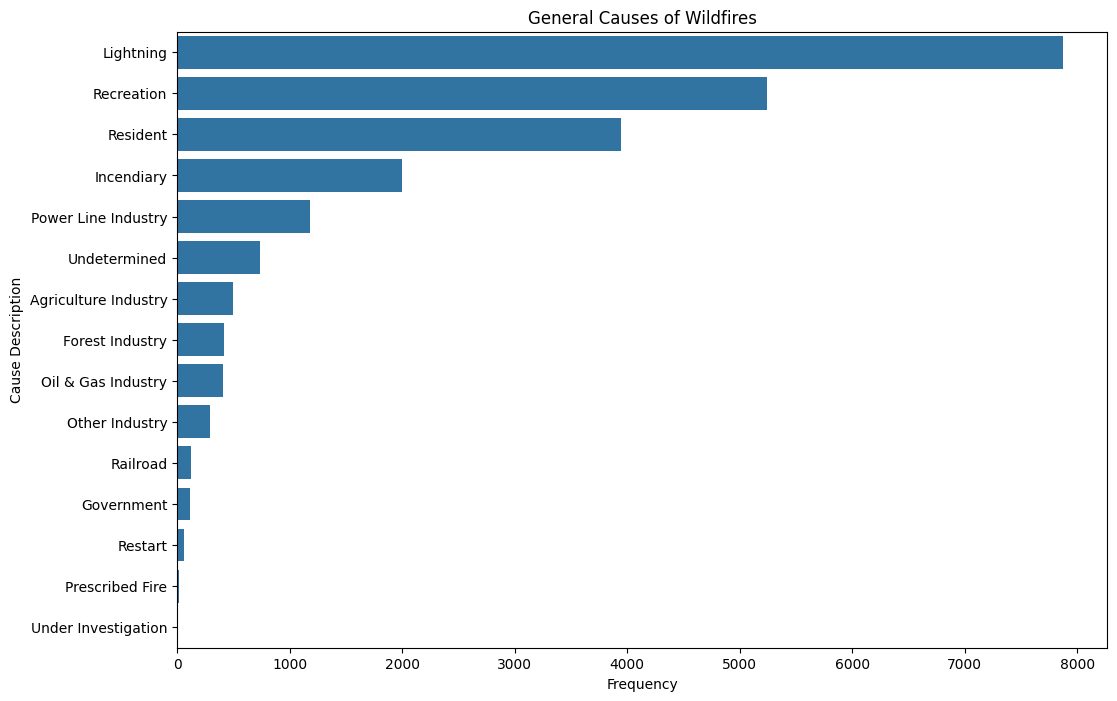

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='general_cause_desc', order=df['general_cause_desc'].value_counts().index)
plt.title('General Causes of Wildfires')
plt.xlabel('Frequency')
plt.ylabel('Cause Description')
plt.show()

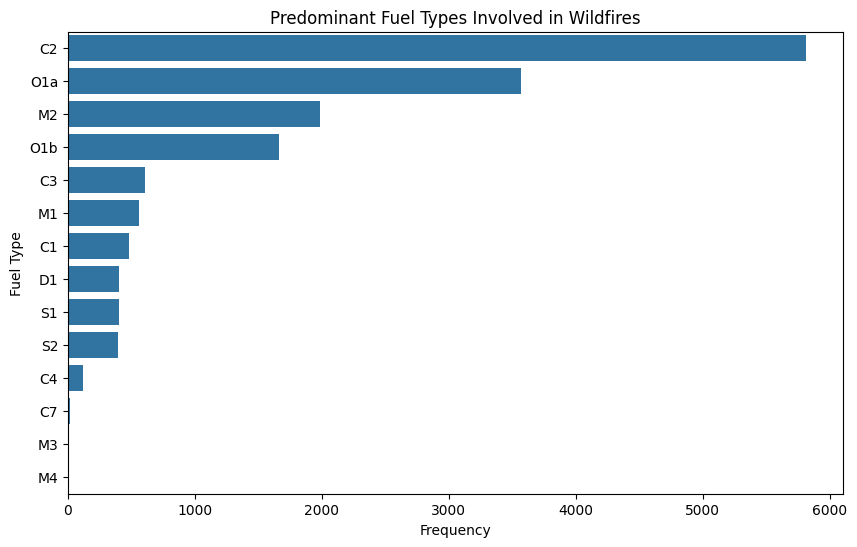

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='fuel_type', order=df['fuel_type'].value_counts().index)
plt.title('Predominant Fuel Types Involved in Wildfires')
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.show()

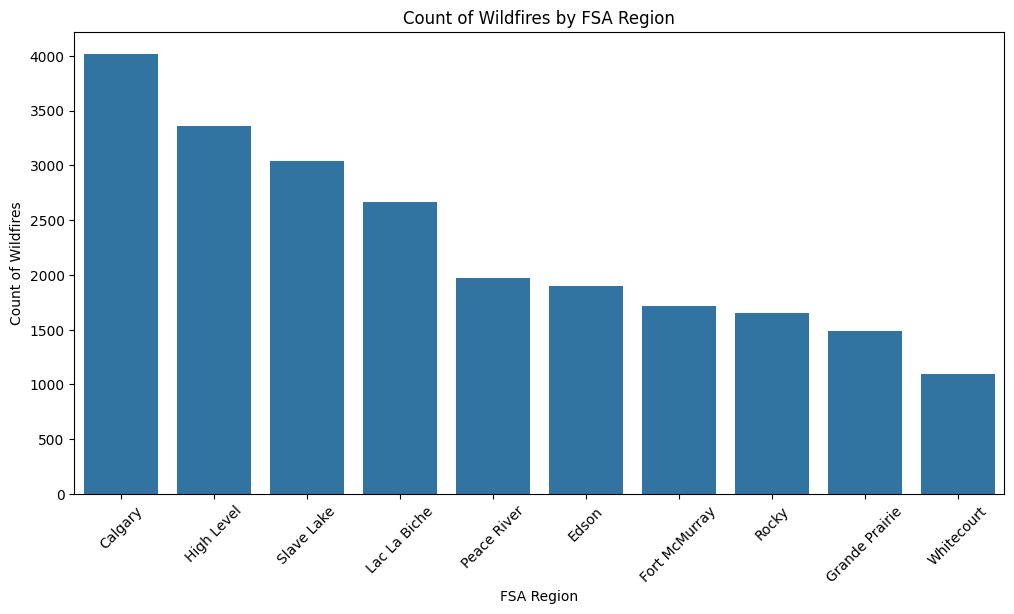

<ipython-input-27-2bd32dfadeb3>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


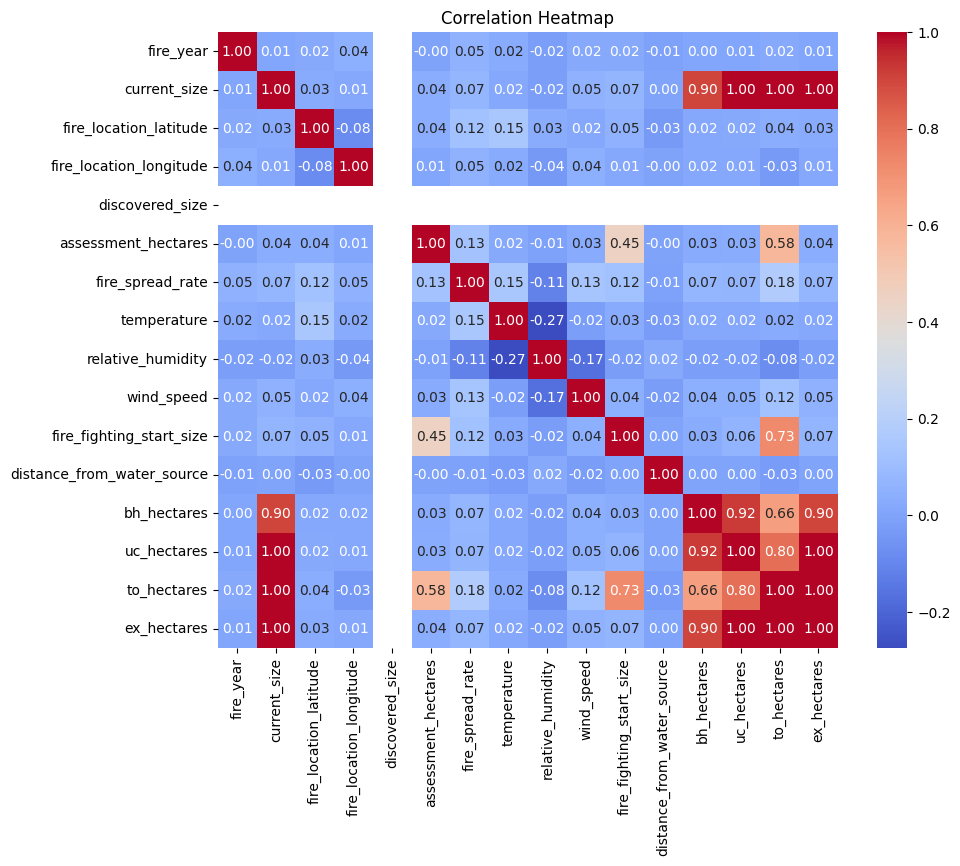

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




df['FSA_region'] = df['fire_number'].apply(lambda x: fsa_mapping.get(x[0]))


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FSA_region', order=df['FSA_region'].value_counts().index)
plt.title('Count of Wildfires by FSA Region')
plt.xlabel('FSA Region')
plt.ylabel('Count of Wildfires')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


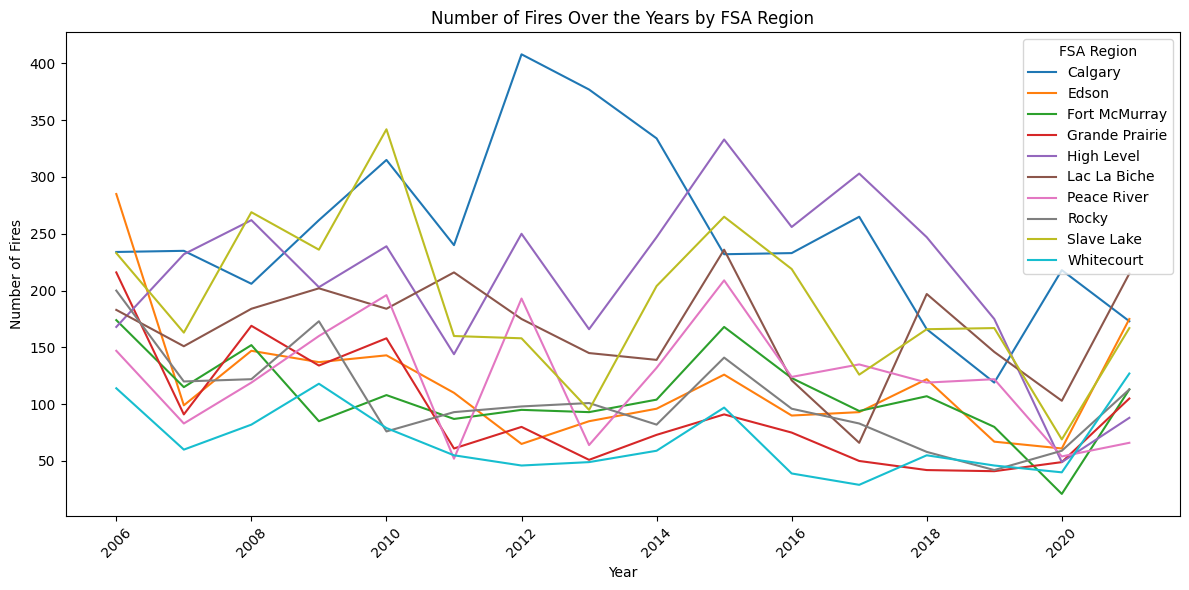

<ipython-input-31-ee6207d62545>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_fires_by_region, x='FSA_region', y='total_num_fires', palette='viridis')


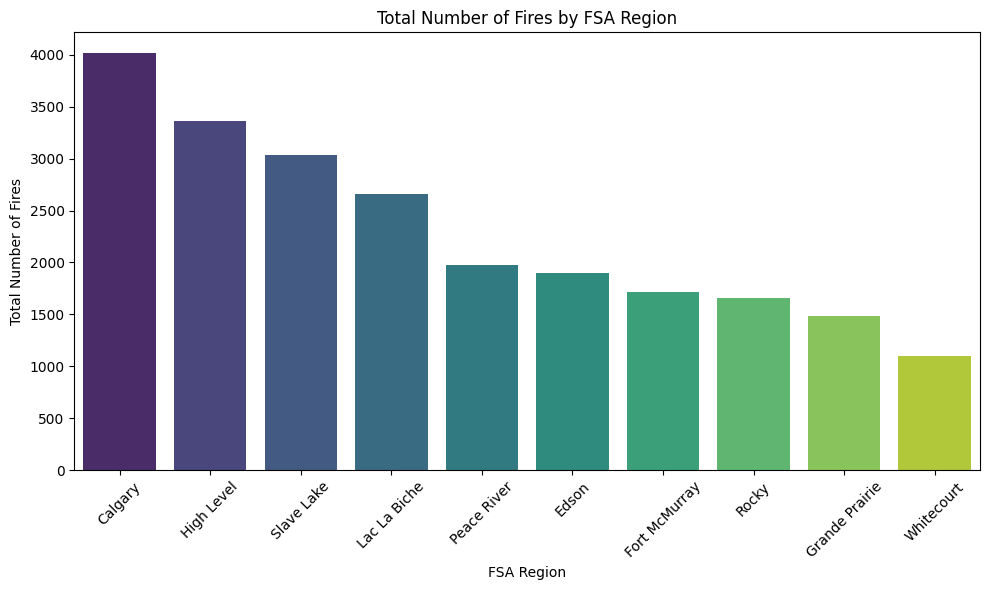

Top Prone Areas:
     FSA_region  total_num_fires
0       Calgary             4017
4    High Level             3362
8    Slave Lake             3039
5  Lac La Biche             2663
6   Peace River             1975


In [ ]:




fires_by_region_year = df.groupby(['FSA_region', 'fire_year']).size().reset_index(name='num_fires')

plt.figure(figsize=(12, 6))
sns.lineplot(data=fires_by_region_year, x='fire_year', y='num_fires', hue='FSA_region')
plt.title('Number of Fires Over the Years by FSA Region')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.legend(title='FSA Region')
plt.tight_layout()
plt.show()


total_fires_by_region = df.groupby('FSA_region').size().reset_index(name='total_num_fires')
total_fires_by_region = total_fires_by_region.sort_values(by='total_num_fires', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=total_fires_by_region, x='FSA_region', y='total_num_fires', palette='viridis')
plt.title('Total Number of Fires by FSA Region')
plt.xlabel('FSA Region')
plt.ylabel('Total Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_prone_areas = total_fires_by_region.head(5)
print("Top Prone Areas:")
print(top_prone_areas)


In [ ]:

region_metrics = df.groupby('region').agg({
    'current_size': 'sum',
    'fire_number': 'count'
}).reset_index()

region_metrics.columns = ['region', 'total_area_burned', 'total_fires']
region_metrics['normalized_area_burned'] = region_metrics['total_area_burned'] / region_metrics['total_area_burned'].max()
region_metrics['normalized_fires'] = region_metrics['total_fires'] / region_metrics['total_fires'].max()
region_metrics['intensity'] = (region_metrics['normalized_area_burned'] + region_metrics['normalized_fires']) / 2
df = df.merge(region_metrics[['region', 'intensity']], on='region', how='left')

<ipython-input-68-531889bb23e8>:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.04, pad=0.05)


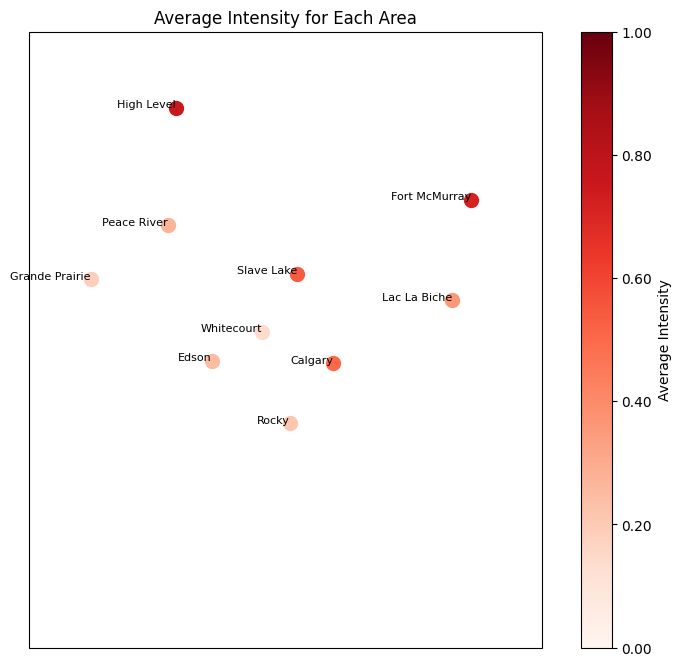

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


region_coordinates = {
    'Calgary': (53.5461, -114.0719),
    'Edson': (53.5890, -116.4340),
    'High Level': (58.5172, -117.1360),
    'Grande Prairie': (55.1700, -118.7947),
    'Lac La Biche': (54.7694, -111.7539),
    'Fort McMurray': (56.7264, -111.3809),
    'Peace River': (56.2262, -117.2844),
    'Rocky': (52.3780, -114.9176),
    'Slave Lake': (55.2844, -114.7694),
    'Whitecourt': (54.1534, -115.4444)
}


plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-120, -110, 48, 60])
ax.coastlines(resolution='10m', color='black', linewidth=1)


for region, coordinates in region_coordinates.items():
    intensity = df[df['region'] == region]['intensity'].mean()
    latitude, longitude = coordinates
    ax.plot(longitude, latitude, 'o', color=plt.cm.Reds(intensity), markersize=10, transform=ccrs.PlateCarree())
    ax.text(longitude, latitude, region, transform=ccrs.PlateCarree(), fontsize=8, color='black', ha='right')


sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('Average Intensity')


legend_labels = [f'{intensity:.2f}' for intensity in np.linspace(0, 1, 6)]
cbar.set_ticks(np.linspace(0, 1, 6))
cbar.ax.set_yticklabels(legend_labels)

plt.title('Average Intensity for Each Area')
plt.show()


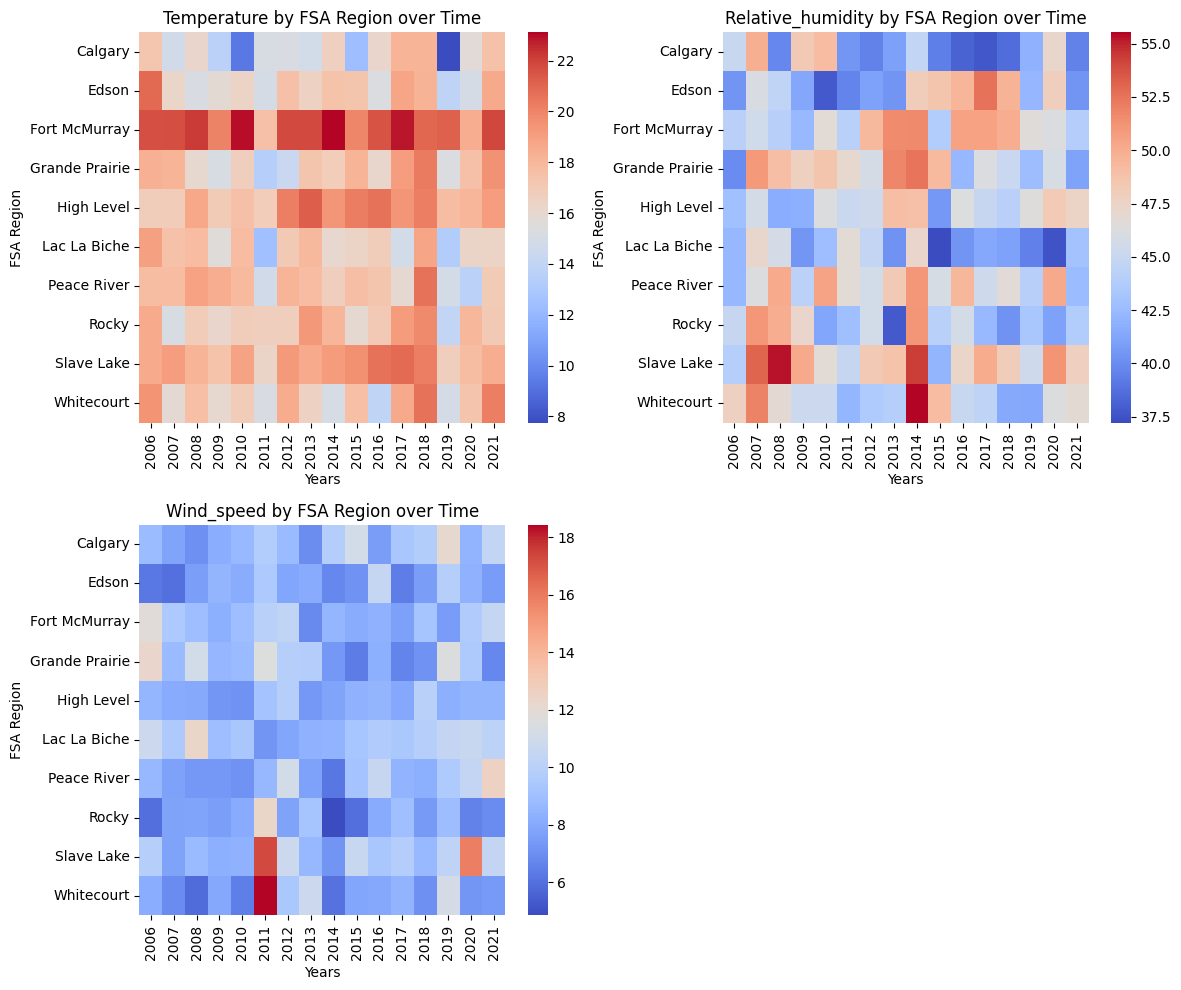

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
environmental_factors = ['temperature', 'relative_humidity', 'wind_speed']
plt.figure(figsize=(12, 10))
for i, factor in enumerate(environmental_factors, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(df.pivot_table(index='FSA_region', columns='fire_year', values=factor), cmap='coolwarm')
    plt.title(f'{factor.capitalize()} by FSA Region over Time')
    plt.xlabel('Years')
    plt.ylabel('FSA Region')

plt.tight_layout()
plt.show()
